In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [4]:
def analytical_solution(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x, y)
    u = (numpy.sinh(1.5*numpy.pi*Y/Ly)/
         numpy.sinh(1.5*numpy.pi*Ly/Lx)*
         numpy.sin(1.5*numpy.pi*X/Lx))
    return u

In [5]:
def plot_3d(x, y, u, label = '$z$', elev=30.0, azim=45.0):
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis)
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])

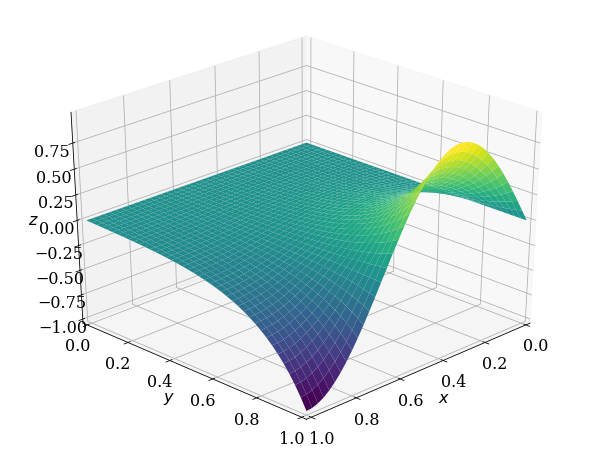

In [6]:
# Set Parameters
Lx, Ly = 1.0, 1.0
nx, ny = 41, 41

# Create the gridline locations
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# Compute the analytical solution
ua = analytical_solution(x, y, Lx, Ly)

# Plot the analytical solution
plot_3d(x, y, ua)

In [7]:
def relative_L2_norm(u, u_ref):
    rdiff = (numpy.sqrt(numpy.sum((u-u_ref)**2))/
            numpy.sqrt(numpy.sum(u_ref**2)))
    return rdiff

In [8]:
def laplace2d_jacobi(u0, rtol = 1e-6, maxiter = 20000):
    u=u0.copy()
    ite = 0 # Iteration index
    rdiff = rtol + 1.0
    while rdiff > rtol and ite < maxiter:
        un = u.copy()
        # Update the solution at interior points
        u[1:-1, 1:-1] = 0.25*(u[:-2, 1:-1] + u[1:-1, :-2] + u[1:-1, 2:] + u[2:, 1:-1])
        
        # Update the boundary conditions
        # At the right bounday 
        u[1:-1, -1] = u[1:-1, -2]
        
        # Compute the residual as the L2-norm of the difference
        rdiff = relative_L2_norm(u, un)
        ite += 1
    return u, ite, rdiff

In [9]:
# Set the initial conditions
u0 = numpy.zeros((ny, nx))
u0[-1, :] = numpy.sin(1.5*numpy.pi*x/Lx)

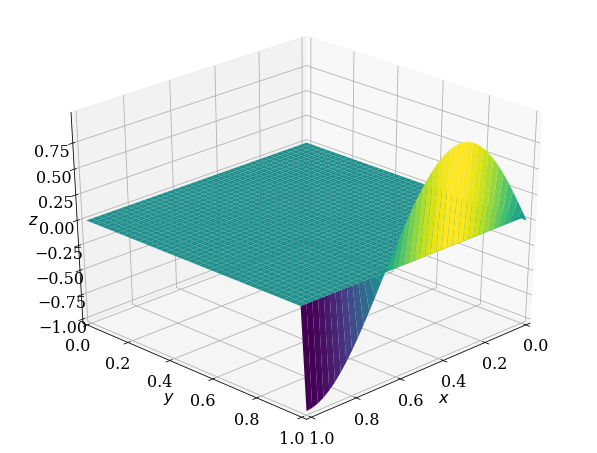

In [10]:
# PLot the initial conditions/solution
plot_3d(x,y,u0)

In [11]:
#Compute the solution using Jacobi relaxation method
u, ites, rdiff = laplace2d_jacobi(u0, rtol=1e-8)
print('Jacobi relaxation: {} iterations'.format(ites) + 
     'to reach a relative difference of {}'.format(rdiff))

Jacobi relaxation: 4473 iterationsto reach a relative difference of 9.989253683735693e-09


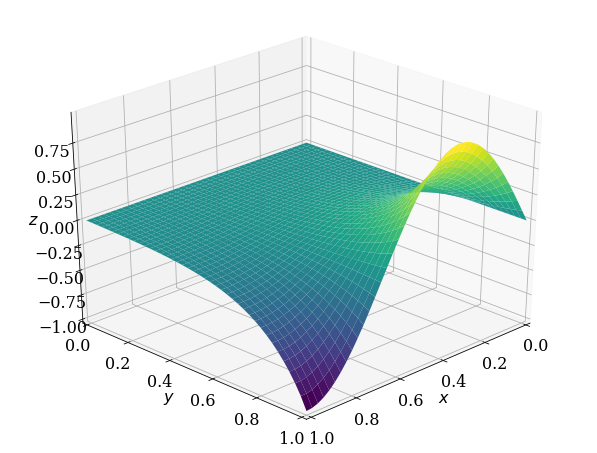

In [12]:
plot_3d(x, y, u)

In [13]:
# List the grid sizes to investigate
nx_values = [11,21,41,81]

# Create an empty list to record the error on each grid
errors = []

# Compute the solution and error for each grid size.
for nx in nx_values:
    print(nx)
    # Create the gridline locations.
    x = numpy.linspace(0.0, Lx, num=nx)
    y = x.copy()
   # Set the initial conditions 
    u0 = numpy.zeros((nx, nx))
    u0[-1, :] = numpy.sin(1.5*numpy.pi*x/Lx)
    
    # Relax the solution. We do not return the number of iterations or the final relative L2-norm of the difference
    u = laplace2d_jacobi(u0, rtol=1e-8)[0]
    
    # Compute the analytical solution.
    ua = analytical_solution(x, y, Lx, Lx)
    
    # Compute and record the relative L2-norm of the error.
    error = relative_L2_norm(u, ua)
    errors.append(error)

11
21
41
81


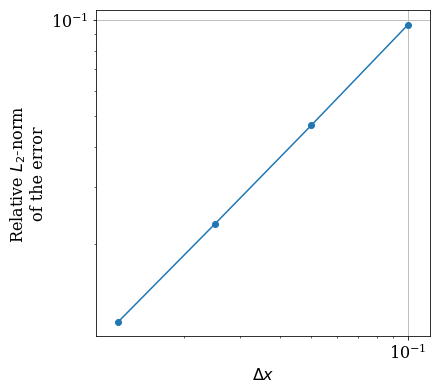

In [14]:
# Plot the error versus the grid-spacing size
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = []
for nx in nx_values:
    dx_values.append(Lx/(nx-1))
pyplot.loglog(dx_values, errors, marker='o')
pyplot.axis('equal');

In [15]:
def laplace2d_jacobi_neumann(u0, rtol = 1e-6, maxiter = 20000):
    u=u0.copy()
    ite = 0 # Iteration index
    rdiff = rtol + 1.0
    while rdiff > rtol and ite < maxiter:
        un = u.copy()
        # Update the solution at interior points
        u[1:-1, 1:-1] = 0.25*(u[:-2, 1:-1] + u[1:-1, :-2] + u[1:-1, 2:] + u[2:, 1:-1])
        
        # Update the boundary conditions
        # At the right bounday 
        u[1:-1, -1] = 0.25*(u[:-2, -1] + 2.0*u[1:-1, -2] + u[2:, -1])
        
        # Compute the residual as the L2-norm of the difference
        rdiff = relative_L2_norm(u, un)
        ite += 1
    return u, ite, rdiff

In [16]:
# List the grid sizes to investigate
nx_values = [11,21,41,81]

# Create an empty list to record the error on each grid
errors = []

# Compute the solution and error for each grid size.
for nx in nx_values:
    print(nx)
    # Create the gridline locations.
    x = numpy.linspace(0.0, Lx, num=nx)
    y = x.copy()
   # Set the initial conditions 
    u0 = numpy.zeros((nx, nx))
    u0[-1, :] = numpy.sin(1.5*numpy.pi*x/Lx)
    
    # Relax the solution. We do not return the number of iterations or the final relative L2-norm of the difference
    u = laplace2d_jacobi_neumann(u0, rtol=1e-8)[0]
    
    # Compute the analytical solution.
    ua = analytical_solution(x, y, Lx, Lx)
    
    # Compute and record the relative L2-norm of the error.
    error = relative_L2_norm(u, ua)
    errors.append(error)

11
21
41
81


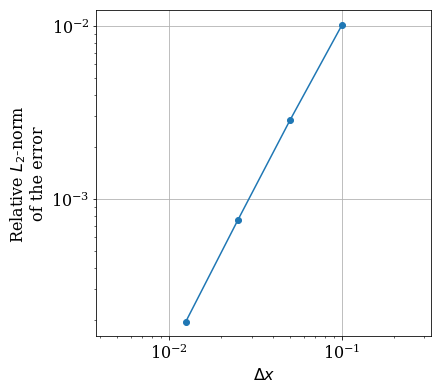

In [17]:
# Plot the error versus the grid-spacing size
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = []
for nx in nx_values:
    dx_values.append(Lx/(nx-1))
pyplot.loglog(dx_values, errors, marker='o')
pyplot.axis('equal');